# Exercises for Continuous Probabilistic Methods

In [1]:
#imports
import pandas as pd
import numpy as np

#viz imports
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [171]:
def print_lower_and_upper_bounds(df, multiplier=1.5):   
    '''
    This function takes in two arguements:
    - data frame 
    - multiplier for iqr (default is 1.5)
    and returns print statments stating the upper and lower bound outliers for 
    each column in the data frame 
    '''
    for col in df:
        if np.issubdtype(df[col].dtype, np.number):
            quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
            iqr = quartile_03 - quartile_01
        
            lower_bound = round(quartile_01 -(multiplier * iqr), 3)
            upper_bound = round(quartile_03 +(multiplier * iqr), 3)
    
            print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")


In [172]:
def get_lower_and_upper_bounds(col, multiplier=1.5):
    '''
    This function takes in two arguements:
    - a pandas series
    - multiplier for iqr (default is 1.5)
    and returns lower_bound, upper_bound
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)

         
    iqr = q3 - q1
        
    lower_bound = round(q1 -(multiplier * iqr), 3)
    upper_bound = round(q3 +(multiplier * iqr), 3)
    
    return lower_bound, upper_bound

In [179]:
def get_outliers(df, multiplier=1.5):
    '''
    This function takes in 2 arguements:
    1. data frame name
    2. multiplier for the IQR (default is 1.5)
    
    It returns a print statement listing the upper and lower bounds for
    each numeric column in the data frame.
    
    It returns a second print statement where any observations
    that are classified as outliers based on the IQR 
    are listed.
    '''

    outliers = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier=multiplier)
            print(f' Lower Bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
            print('------') 
            outliers[col] = {}
            outliers[col]['bounds'] = {'upper' : upper_bound, 'lower' : lower_bound}
            outliers[col]['df'] = df[(df[col] > upper_bound) |  (df[col] < lower_bound)]
        else:
            pass
        
    [print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]

### Part 2

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [174]:
#Aquire the data
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)

df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [175]:
#Convert the date column to datetime format
df.Date = pd.to_datetime(df.Date)

#Set the date as the index
df = df.set_index('Date')

#### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [176]:
#Get upper and lower bounds with a multiplier of 1.5
print_lower_and_upper_bounds(df)

The lower and upper bound of the range for 'Temperature' respectively is: 16.7 and 104.7
The lower and upper bound of the range for 'Rainfall' respectively is: 0.26 and 1.3
The lower and upper bound of the range for 'Flyers' respectively is: 4.0 and 76.0
The lower and upper bound of the range for 'Price' respectively is: 0.5 and 0.5
The lower and upper bound of the range for 'Sales' respectively is: 5.0 and 45.0


In [180]:
#Use get_outliers function to get the outliers in Temperature
get_outliers(df)

 Lower Bound for Temperature : 16.7
 Upper bound for Temperature: 104.7

------
 Lower Bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

------
 Lower Bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

------
 Lower Bound for Price : 0.5
 Upper bound for Price: 0.5

------
 Lower Bound for Sales : 5.0
 Upper bound for Sales: 45.0

------

~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales
Date                                                             
2017-02-11  Saturday        212.0      0.91      35    0.5     21
2017-12-31    Sunday         15.1      2.50       9    0.5      7

~~~~~~~~~~
 Rainfall :
                   Day  Temperature  Rainfall  Flyers  Price  Sales
Date                                                              
2017-01-01     Sunday         27.0      2.00      15    0.5     10
2017-01-02     Monday         28.9      1.33      15    0.5     13
2017-01-03    Tuesday         34.5      1.33      27    0.5     

**Takeaways:**
- The outliers from the Sales column:
    - Observation 181 = Should be kept bc it was a weekend and a very hot day...high lemonade sales makes sense
    - Observation 182 = Hot, Weekend Day...keep the observation
    - Observation 183 = Monday, not so hot...would say remove except for the fact that the next day is 4th of July
    - Observation 184 = 4th of July and warm...quintessential Lemonade day. Keep!
    
- The outliers from the Price Column:
    - None as expected
    
- The outliers from the Flyers columns:
    - Need to deal with neg flyers
    
- The Outliers in Rainfall:
    - Nothing looks too abnormal here
    
- The outliers in Temp:
    - 212 degrees must be a typo?

#### b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Completed above

#### c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [14]:
#Print the lower and upperbounds for each column with a mulyiplier of 3 
print_lower_and_upper_bounds(df, 3)

The lower and upper bound of the range for 'Temperature' respectively is: -16.3 and 137.7
The lower and upper bound of the range for 'Rainfall' respectively is: -0.13 and 1.69
The lower and upper bound of the range for 'Flyers' respectively is: -23.0 and 103.0
The lower and upper bound of the range for 'Price' respectively is: 0.5 and 0.5
The lower and upper bound of the range for 'Sales' respectively is: -10.0 and 60.0


In [181]:
#Get the outliers
get_outliers(df, multiplier=3)

 Lower Bound for Temperature : -16.3
 Upper bound for Temperature: 137.7

------
 Lower Bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

------
 Lower Bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

------
 Lower Bound for Price : 0.5
 Upper bound for Price: 0.5

------
 Lower Bound for Sales : -10.0
 Upper bound for Sales: 60.0

------

~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales
Date                                                             
2017-02-11  Saturday        212.0      0.91      35    0.5     21

~~~~~~~~~~
 Rainfall :
                 Day  Temperature  Rainfall  Flyers  Price  Sales
Date                                                            
2017-01-01   Sunday         27.0      2.00      15    0.5     10
2017-12-05  Tuesday         22.0      1.82      11    0.5     10
2017-12-10   Sunday         31.3      1.82      15    0.5     11
2017-12-31   Sunday         15.1      2.50       9    0.5      7


**Takeaways:**
- Nothing new discovered here

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Temperature


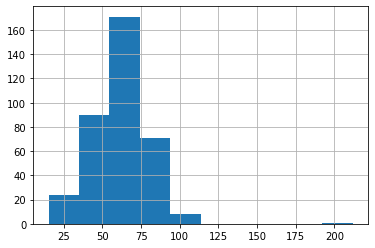

Rainfall


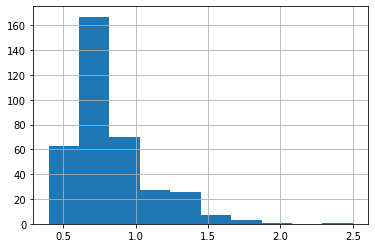

Flyers


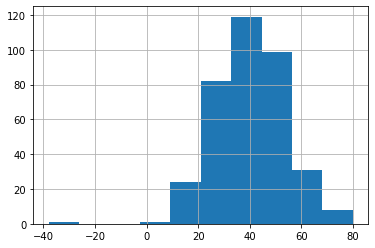

Price


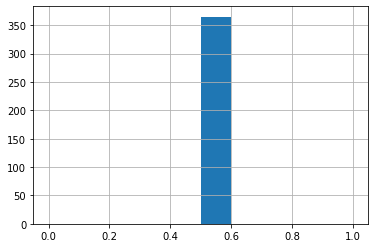

Sales


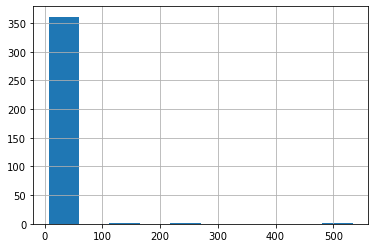

In [17]:
#Plot hist for each column to check distribution
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

**Normally Distributed:**<br>
    - Temp<br>
    - Flyers? How do you have negative 40?

- a. Use a 2 sigma decision rule to isolate the outliers.

In [183]:
#Calculate z-scores for temp
df['z_score_temp'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

In [189]:
#isloate the observations where zscore for temp is greater than 2 std
df[df.z_score_temp.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_temp,z_score_rain,z_score_flyers,z_score_sales
Date,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


In [190]:
#Calculate z-scores for rainfall
df['z_score_rain'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

#isloate the observations where zscore for rainfall is greater than 2 std
df[df.z_score_rain.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_temp,z_score_rain,z_score_flyers,z_score_sales
Date,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
2017-12-10,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-0.544968
2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


In [191]:
#Calculate z-scores for flyers
df['z_score_flyers'] = (df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()

#isloate the observations where zscore for flyers is greater than 2 std
df[df.z_score_flyers.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_temp,z_score_rain,z_score_flyers,z_score_sales
Date,,,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


In [192]:
#Calculate z-scores for Sales
df['z_score_sales'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

#isloate the observations where zscore for Sales is greater than 2 std
df[df.z_score_sales.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_temp,z_score_rain,z_score_flyers,z_score_sales
Date,,,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
2017-07-02,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
2017-07-03,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


- b. Do these make sense? Yes
- c. Should certain outliers be kept or removed? Already addressed in IQR

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

**I reran the code above and replaced with 3 to complete this.**<br>
**No new takeaways regarding outliers were obtained from using 2/3 sigma rules vs using the IQR**